# Uppgift 1 - uppvärmning betyg och prov
### I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

- a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf

In [138]:
import pandas as pd
import plotly_express as px

custom_colors = ['#b2e061', '#fd7f6f', '#7eb0d5', '#ffee65']
custom_colors = ['#404040', '#FF9700', '#0275E0']



file_path = "betyg_o_prov_riksnivå.xlsx"
df = pd.read_excel(file_path, sheet_name="Tabell 1B", skiprows=7).head()

columns_to_exclude = ['Totalt', 'Flickor', 'Pojkar', 'Totalt.1', 'Flickor.1', 'Pojkar.1']
df = df.drop(columns=columns_to_exclude)

df.index = df.iloc[:, 0]
df = df.drop(columns=df.columns[0])
df = df.rename(columns=lambda x: x.replace('.2', ''))

df

,Totalt,Flickor,Pojkar
Unnamed: 0,,,
2018/19,24.5,21.7,27.2
2019/20,23.9,21.4,26.3
2020/21,23.9,21.9,25.9
2021/22,25.9,24.2,27.5
2022/23,26.8,25.5,28.0


In [139]:
fig = px.line(df, x=df.index, y=df.columns, title="Andel elever som saknar godkänt betyg i ett eller fler ämnen",
              color_discrete_sequence=custom_colors,
              labels={'index': 'Läsår', 'value': 'Andel elever (%)', 'variable': 'Kön'})

fig.update_layout(template='plotly_white', font=dict(family='Arial', size=17),
                  xaxis_title="Läsår", yaxis_title="Andel elever (%)",
                  legend=dict(orientation='v', yanchor='top', y=-0.2, xanchor='right', x=1,
                              traceorder='normal', bordercolor='gray', borderwidth=1, title=None),
                  title=dict(x=0.5),
                  yaxis=dict(range=[19, 30]),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  margin=dict(l=120, r=120, t=120, b=120),
                  height=800,
                  width=1200)

fig.update_xaxes(range=[-0.2,4.2])

fig.update_traces(line=dict(width=2, dash='dash'), mode='lines+markers', marker=dict(size=10), 
                  texttemplate='%{y:.1f}', textposition='top center', textfont=dict(size=12, color='black')) 

fig.show()

fig.write_html('visualiseringar/andel_betyg.html')

# point/marker for each year, the lines could be dashed, 

#### b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

In [140]:
file_path = "betyg_o_prov_riksnivå.xlsx"
df = pd.read_excel(file_path, sheet_name="Tabell 1B", skiprows=7).head()

columns_to_exclude = ['Totalt.2', 'Flickor.2', 'Pojkar.2', 'Totalt.1', 'Flickor.1', 'Pojkar.1']
df = df.drop(columns=columns_to_exclude)

df.index = df.iloc[:, 0]
df = df.drop(columns=df.columns[0])

df = df.rename(columns=lambda x: x.replace('.2', ''))

df

,Totalt,Flickor,Pojkar
Unnamed: 0,,,
2018/19,221.7,234.3,209.8
2019/20,222.9,235.7,210.9
2020/21,223.9,235.4,212.9
2021/22,221.2,231.6,211.4
2022/23,220.6,229.7,211.9


In [141]:
fig = px.line(df, x=df.index, y=df.columns, title="Meritvärde för 16 ämnen för totalt, flickor och pojkar",
              color_discrete_sequence=custom_colors,
              labels={'index': 'Läsår', 'value': 'Meritvärde', 'variable': 'Kön'})

fig.update_layout(template='plotly_white', font=dict(family='Arial', size=17),
                  xaxis_title="Läsår", yaxis_title="Meritvärde",
                  legend=dict(orientation='v', yanchor='top', y=-0.2, xanchor='right', x=1,
                              traceorder='normal', bordercolor='gray', borderwidth=1, title=None),
                  title=dict(x=0.5),
                  xaxis=dict(ticklen=10, tickfont=dict(size=16)),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                   yaxis=dict(range=[200, 245], tickfont=dict(size=16)),
                  margin=dict(l=150, r=120, t=120, b=120),
                  height=800,
                  width=1500)  # Adjust the width of the figure)

fig.update_traces(line=dict(width=2, dash='dash'), mode='lines+markers', marker=dict(size=10), 
                  texttemplate='%{y:.1f}', textposition='top center', textfont=dict(size=20, color='black')) 

fig.update_xaxes(range=[-0.2,4.2])

fig.write_html('visualiseringar/meritvarde_16.html')

fig.show()

##### c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

The following code is an attempt to visualize school performance of students of different origins.

In [142]:

file_path = "betyg_o_prov_riksnivå.xlsx"

df = pd.read_excel(file_path, sheet_name="Tabell 1B", skiprows=7)
df.index = df.iloc[:, 0]
df.drop(df.columns[0], axis=1, inplace=True)

df.rename(columns={'Totalt': 'M 16 Totalt', 'Flickor': 'M 16 Flickor', 'Pojkar': 'M 16 Pojkar'}, inplace=True)
df.rename(columns={'Totalt.1': 'M 17 Totalt', 'Flickor.1': 'M 17 Flickor', 'Pojkar.1': 'M 17 Pojkar'}, inplace=True)
df.rename(columns={'Totalt.2': 'Saknar Betyg Totalt', 'Flickor.2': 'Saknar Betyg Flickor', 'Pojkar.2': 'Saknar Betyg Pojkar'}, inplace=True)

df

#Födda i Sverige - Nyinvadrare elever - Födda utomlands, inv. före 2014
# Yaxes = %, Xaxes = meritvärde 16
# use maskering, filtering, query

,M 16 Totalt,M 16 Flickor,M 16 Pojkar,M 17 Totalt,M 17 Flickor,M 17 Pojkar,Saknar Betyg Totalt,Saknar Betyg Flickor,Saknar Betyg Pojkar
Unnamed: 0,,,,,,,,,
2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# Select relevant rows
selected_titles = ["Födda i Sverige", "Födda utomlands, inv. före 2014", "Födda utomlands, inv. 2014 el. senare", "Nyinvandrade elever"]

mask = df.index.isin(selected_titles)

selected_rows = df[mask]

selected_rows


,M 16 Totalt,M 16 Flickor,M 16 Pojkar,M 17 Totalt,M 17 Flickor,M 17 Pojkar,Saknar Betyg Totalt,Saknar Betyg Flickor,Saknar Betyg Pojkar
Unnamed: 0,,,,,,,,,
Födda i Sverige,215.5,224.7,206.6,223.0,232.8,213.5,32.6,30.8,34.3
"Födda utomlands, inv. före 2014",217.4,227.6,208.0,224.8,235.8,214.7,32.0,29.8,34.0
"Födda utomlands, inv. 2014 el. senare",182.1,193.1,171.8,186.1,197.7,175.1,54.3,51.1,57.2
Nyinvandrade elever,144.8,152.0,138.2,146.2,153.6,139.3,75.0,72.9,77.0


In [144]:
# Select relevant rows
selected_columns = ["M 16 Totalt", "Saknar Betyg Totalt"]

selected_data = selected_rows[selected_columns]

selected_data.rename(index={'Födda utomlands, inv. före 2014': 'Födda utomland\ninv. före\n2014', 
                             'Födda utomlands, inv. 2014 el. senare': 'Födda utomlands\ninv. 2014\nel. senare',
                             'Nyinvandrade elever': 'Nyinvandrade\nelever'}, 
                     inplace=True)

selected_rows

C:\Users\arthu\AppData\Local\Temp\ipykernel_22876\2040918619.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,M 16 Totalt,M 16 Flickor,M 16 Pojkar,M 17 Totalt,M 17 Flickor,M 17 Pojkar,Saknar Betyg Totalt,Saknar Betyg Flickor,Saknar Betyg Pojkar
Unnamed: 0,,,,,,,,,
Födda i Sverige,215.5,224.7,206.6,223.0,232.8,213.5,32.6,30.8,34.3
"Födda utomlands, inv. före 2014",217.4,227.6,208.0,224.8,235.8,214.7,32.0,29.8,34.0
"Födda utomlands, inv. 2014 el. senare",182.1,193.1,171.8,186.1,197.7,175.1,54.3,51.1,57.2
Nyinvandrade elever,144.8,152.0,138.2,146.2,153.6,139.3,75.0,72.9,77.0


C:\Users\arthu\AppData\Local\Temp\ipykernel_22876\2335407190.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\arthu\AppData\Local\Temp\ipykernel_22876\2335407190.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




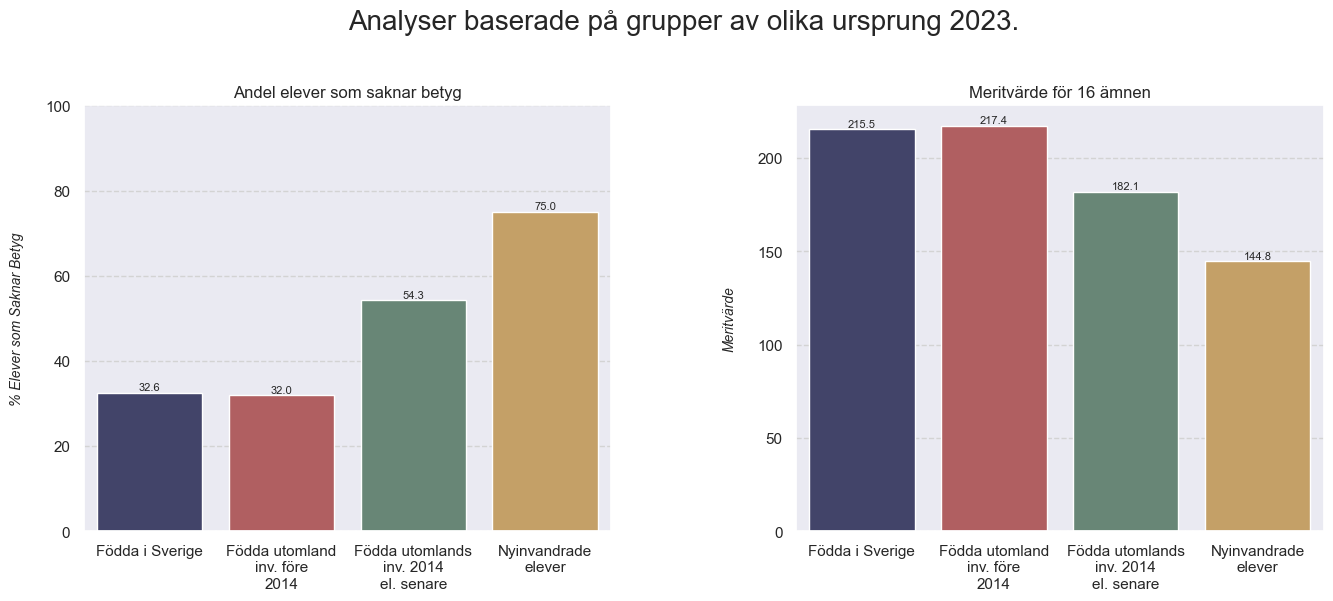

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_colors = ['#3B3E6F', '#BD5254', '#638B76', '#D4A457']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot for Percentage of students missing Grades
ax1 = axes[0]
bars1 = sns.barplot(data=selected_data, x=selected_data.index, y='Saknar Betyg Totalt', palette=custom_colors, ax=ax1)
ax1.set_title('Andel elever som saknar betyg', fontsize=12)
ax1.set_xlabel(None)
ax1.set_ylabel('% Elever som Saknar Betyg', fontsize=10, fontstyle='italic', labelpad=15)
ax1.set_ylim(0, 100) 

# Add value labels
for bar in bars1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Subplot for Meritvärde
ax2 = axes[1]
bars2 = sns.barplot(data=selected_data, x=selected_data.index, y='M 16 Totalt', palette=custom_colors, ax=ax2)
ax2.set_title('Meritvärde för 16 ämnen', fontsize=12)
ax2.set_xlabel(None)
ax2.set_ylabel('Meritvärde', fontsize=10, fontstyle='italic', labelpad=15)
ax2.set_xlim(-0.5, 3.5)

for bar in bars2.patches:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=1, color='lightgray')


fig.suptitle('Analyser baserade på grupper av olika ursprung 2023.', fontsize=20)
plt.subplots_adjust(wspace=0.35, hspace=0.3, top=0.82)

plt.savefig('visualiseringar/saknarbetyg_meritvarde_subplot.png', bbox_inches='tight', transparent=True, pad_inches=0, facecolor=(1, 1, 1))
plt.show()


scatter 

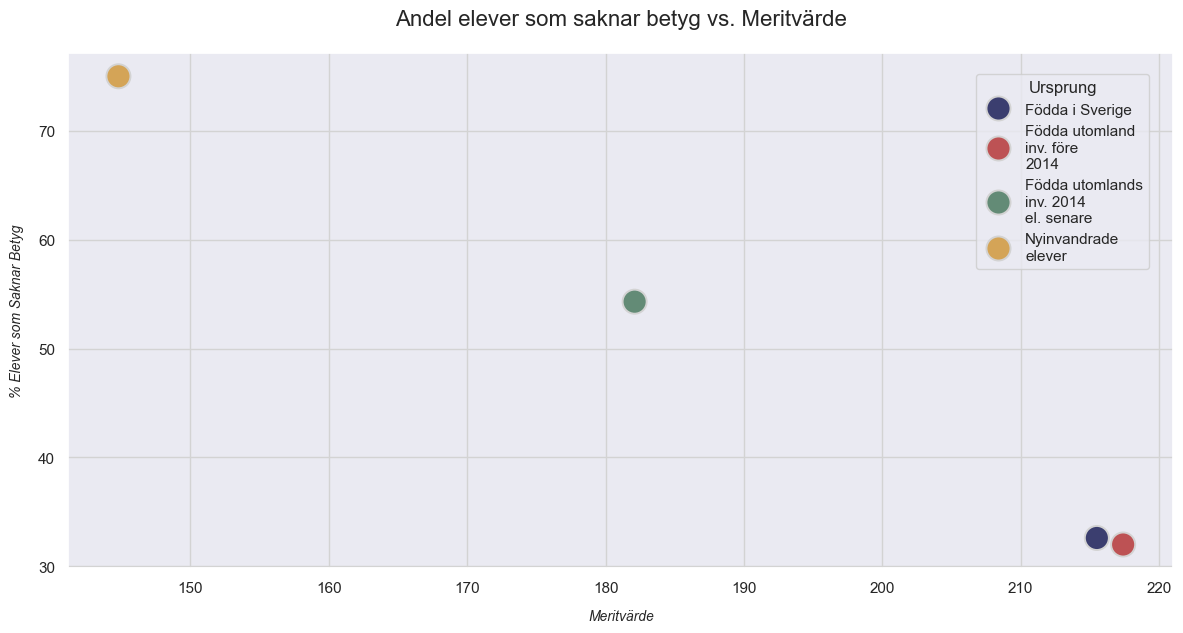

In [146]:
# Scatter plot
sns.set_style("whitegrid")
sns.set_theme(palette='deep')

plt.figure(figsize=(12, 6.5))
sns.scatterplot(data=selected_data, x='M 16 Totalt', y='Saknar Betyg Totalt', c='skyblue', edgecolors='lightgray', hue=selected_data.index, palette=custom_colors, s=300)

plt.title('Andel elever som saknar betyg vs. Meritvärde', fontsize=16, pad=20)
plt.xlabel('Meritvärde', fontsize=10, style='italic', labelpad=10)
plt.ylabel('% Elever som Saknar Betyg', fontsize=10, style='italic', labelpad=10)

plt.legend(title='Ursprung', bbox_to_anchor=(0.9, 0.77), loc='center')
plt.grid(True, color='lightgray')
plt.tight_layout()

plt.savefig('visualiseringar/saknarbetyg_vs_meritvarde.png', bbox_inches='tight', transparent=True, pad_inches=0, facecolor=(1, 1, 1))
plt.show()
